In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
iris = load_iris()

In [7]:
x = iris.data
y = iris.target

### KNN, K = 5

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
# 10 fold Cross Validation
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
scores.mean()

0.9666666666666668

In [13]:
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

### KNN, K = 3

In [14]:
# 10 fold Cross Validation
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
scores.mean()

0.9666666666666666

### KNN, K = 7

In [16]:
# 10 fold Cross Validation
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
scores.mean()

0.9666666666666668

In [20]:
#search the best value of k
k_range = list(range(1,31))


k_score = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    k_score.append(scores.mean())
    
k_score    

[0.96,
 0.9533333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9800000000000001,
 0.9666666666666666,
 0.9666666666666666,
 0.9733333333333334,
 0.96,
 0.9666666666666666,
 0.96,
 0.9666666666666666,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334]

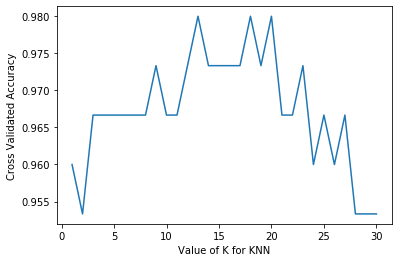

In [21]:
#plot to check the best value of K

plt.plot(k_range,k_score)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross Validated Accuracy")
plt.show()

In [ ]:
- Grid Search CV
- Randomize Search CV

#### Grid Search CV

In [23]:
from sklearn.model_selection import GridSearchCV

In [25]:
# define parameters grid
param_grid = { "n_neighbors" : k_range }

In [26]:
param_grid

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

In [27]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

In [28]:
grid.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [29]:
grid.cv_results_

{'mean_fit_time': array([0.00134327, 0.0015343 , 0.00124097, 0.00121677, 0.00149047,
        0.00110416, 0.00087099, 0.00130904, 0.00136812, 0.00151484,
        0.00161636, 0.00112674, 0.00129075, 0.00119121, 0.00137746,
        0.0015708 , 0.0013119 , 0.00136554, 0.00104623, 0.00116184,
        0.00142198, 0.00107348, 0.00120752, 0.00130928, 0.00127838,
        0.00142703, 0.00103412, 0.00119386, 0.00138729, 0.00150282]),
 'std_fit_time': array([4.93825168e-04, 4.84161054e-04, 4.14030444e-04, 4.38934578e-04,
        4.57537208e-04, 3.56890424e-04, 3.49600713e-04, 5.47524965e-04,
        4.42374363e-04, 5.24830521e-04, 5.03702483e-04, 2.32266382e-04,
        4.29729258e-04, 5.86239881e-04, 4.33688851e-04, 4.89307237e-04,
        5.20683254e-04, 4.96500554e-04, 9.34989882e-05, 4.58834278e-04,
        4.52480774e-04, 3.02558968e-04, 3.94422551e-04, 4.81584547e-04,
        4.80361401e-04, 4.56295094e-04, 2.95338232e-04, 3.67168810e-04,
        4.59385510e-04, 4.98253602e-04]),
 'mean_scor

In [32]:
pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score','params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [33]:
#examining the best model
print(grid.best_score_)
print(grid.best_params_)

0.9800000000000001
{'n_neighbors': 13}


### Searching multiple hyper-parameters

In [ ]:
1 parameter 10 CV = 10
30 parameters 10 CV = 300
2*30 paramteres 10 CV = 600

In [34]:
# define parameters grid
param_grid = { "n_neighbors" : k_range, "weights" : ['uniform','distance']}

In [35]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [36]:
#view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score','params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.953333,0.052068,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.960000,0.053333,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'distance'}"


In [37]:
#examining the best model
print(grid.best_score_)
print(grid.best_params_)

0.9800000000000001
{'n_neighbors': 13, 'weights': 'uniform'}


In [38]:
# train our model using all the best parameters
knn = KNeighborsClassifier(n_neighbors=13,weights='uniform')
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [40]:
knn.predict([[3,4,5,2]])

array([1])

In [41]:
# shortcut : GridSearchCV automatically refits the best modeil using all the data wioth the best parameter
grid.predict([[3,4,5,2]])

array([1])

### Reducing the computational expense using RandomizeSearchCV

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
# define parameters grid
param_grid = { "n_neighbors" : k_range, "weights" : ['uniform','distance']}

In [47]:
rand = RandomizedSearchCV(knn, param_grid, cv=10, scoring = 'accuracy',
                          n_iter=15,random_state=5, return_train_score=False)

In [48]:
rand.fit(x,y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=13,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']},
 

In [49]:
pd.DataFrame(rand.cv_results_)[['mean_test_score','std_test_score','params']]

,mean_test_score,std_test_score,params
0,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 16}"
1,0.966667,0.033333,"{'weights': 'uniform', 'n_neighbors': 22}"
2,0.980000,0.030551,"{'weights': 'uniform', 'n_neighbors': 18}"
3,0.966667,0.044721,"{'weights': 'uniform', 'n_neighbors': 27}"
4,0.953333,0.042687,"{'weights': 'uniform', 'n_neighbors': 29}"
5,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 10}"
6,0.966667,0.044721,"{'weights': 'distance', 'n_neighbors': 22}"
7,0.973333,0.044222,"{'weights': 'uniform', 'n_neighbors': 14}"
8,0.973333,0.044222,"{'weights': 'distance', 'n_neighbors': 12}"
9,0.973333,0.032660,"{'weights': 'uniform', 'n_neighbors': 15}"


In [50]:
#examining the best model
print(rand.best_score_)
print(rand.best_params_)

0.9800000000000001
{'weights': 'uniform', 'n_neighbors': 18}
